In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
link = './../data/NSW/nsw_df.parquet'
nsw_df = pd.read_parquet(link)
nsw_df.head(2)

,TOTALDEMAND,FORECASTDEMAND,TEMPERATURE,rrp,daily_avg_actual,daily_avg_forecast,forecast_error,smoothed_forecast_demand,year,quarter,month,dow,doy,hour,season,smoothed_total_demand,smoothed_temperature,minutes_past_midnight
2010-01-02 00:30:00,7343.30,7216.295694,24.3,20.67,NaN,NaN,91.620905,7699.974365,2010,1,1,5,2,0,1,7781.995417,25.233333,30
2010-01-02 01:00:00,7099.73,6977.373562,24.2,19.27,NaN,NaN,91.620905,7690.566078,2010,1,1,5,2,1,1,7773.996250,25.266667,60


In [3]:
c_map = {'Summer':'red', 'Autumn':'brown', 'Winter':'blue', 'Spring':'orange'}
nsw_df['season_name'] = nsw_df['month'].map(lambda m: 'Summer' if m in [1, 2, 12] else ('Autumn' if m in [3, 4, 5] else ('Winter' if m in [6, 7, 8] else 'Spring'))).astype('category')

In [4]:
temp_highest_allowed = 35.16
temp_lowest_allowed = -0.1

In [53]:
def outlier_plot(df=nsw_df, var_name='TOTALDEMAND', hue='season', color_map='viridis', legend_title='legend', axis_units='kW'):
    # Main Scatter Plot
    plt.figure(figsize=(15, 6))
    for group in df[hue].unique():
        df_grouped = df[df[hue] == group]
        plt.scatter(df_grouped.index, df_grouped[var_name], c=color_map[group],edgecolor='white') #, s=20, alpha=0.7)
        #plt.scatter(df_grouped.index, df_grouped[var_name], c=color_map[group])
    
    # Legend
    plt.legend(title=legend_title.title(), loc='lower right', frameon=True, labels=df[hue].unique())
    
    # Labelling Axis / Title
    plt.grid(True) #Grid
    plt.xlabel(f'Time')
    plt.ylabel(f'{var_name.title()} ({axis_units})')
    plt.title(f'Time Graph: {var_name.title()}')
    
    return None

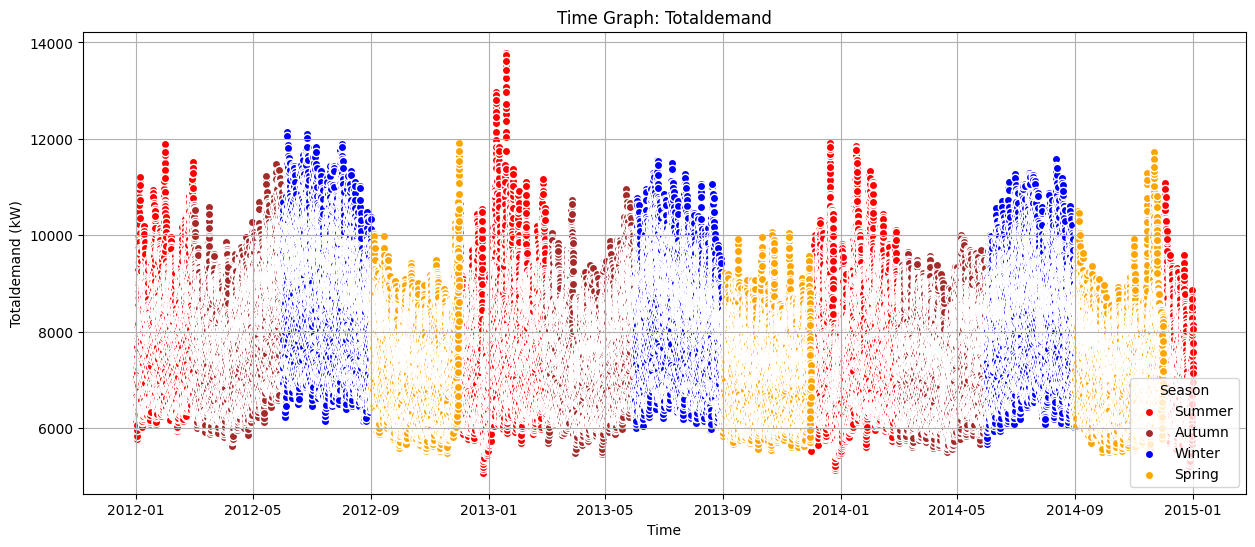

In [54]:
outlier_plot(df=nsw_df.loc['2012':'2014'],var_name='TOTALDEMAND', hue='season_name', color_map=c_map, legend_title='season')

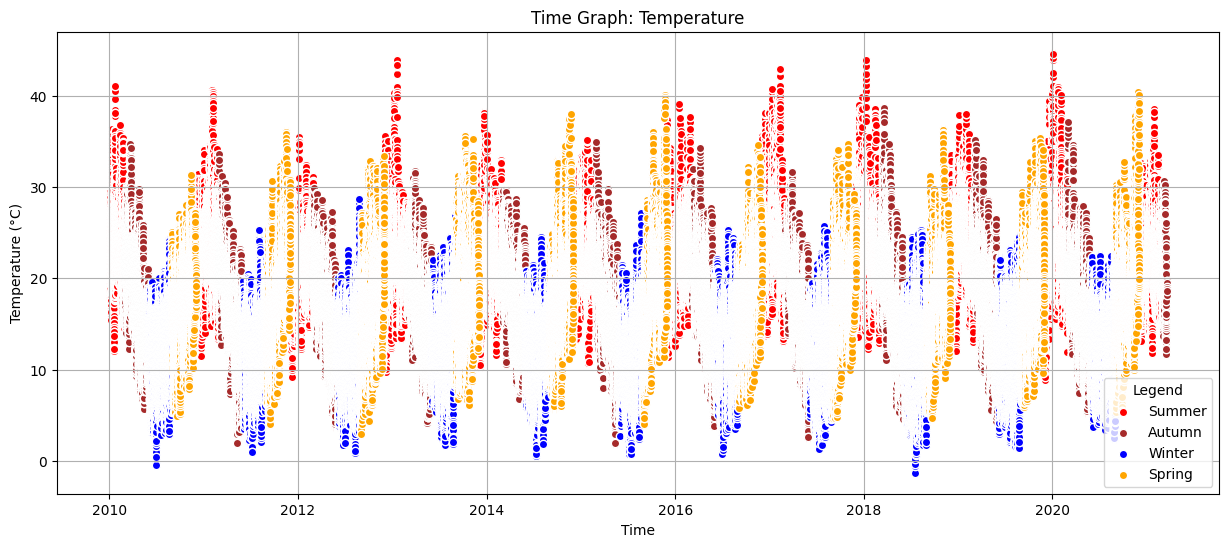

In [56]:
outlier_plot(var_name='TEMPERATURE', hue='season_name', axis_units='°C', color_map=c_map,  legend_title='season')